## Caso Origen Destino Colombia Mes 2021

Primera práctica manejando datos públicos de Colombia para hacer visualizaciones y analísis estadístico. El primer paso que vamos a realizar es importar las librerias de python con las que trabajaremos.

In [1]:
%matplotlib inline
# Añadir los gráficos en el cuaderno, se usa dentro de los cuadernos jupyter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import iqr

Ahora vamos a importar los datos con los que vamos a trabajar las visualizaciones, teniendo en cuenta que hay palabras reservadas dentro de python, ejemplo, data, esto quiere decir que en algunas librerias la palabra data ya esta predefinida como parametro, y la idea es tener una buena práctica y no usar palabras reservadas porque podriamos producir errores en nuestros programas.

In [19]:
# df = data frame - dimesión columna, dimensión filas

# Con pandas vamos a abrir nuestro archivo
df = pd.read_csv("Base de Datos Origen - Destino Diciembre 2021.csv")

Primera visualización de nuestros datos para hacernos una idea de ellos, irlos conociendo, conocer el tipo de variables y observaciones existentes, para ello, vamos a ver primero vamos a representar nuestros datos en forma de tabla, y luego podremos obtener valores estadísticos de los mismos. 

In [32]:
df.head()

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,PesoCargaYCorreo
0,0EC,SAE,01-dic-21 00:00:00,2021,12,A02,CAÑO COLORADO,PUERTO INIRIDA,COLOMBIA,IDA,CESAR GAVIRIA TRUJILLO,PUERTO INIRIDA,COLOMBIA,N,T,3.0,13
1,0EC,SAE,01-dic-21 00:00:00,2021,12,A07,MORICHAL VIEJO,SAN JOSE DEL GUAVIARE,COLOMBIA,SJE,SAN JOSE DEL GUAVIARE- JORGE E GONZ,SAN JOSE DEL GUAVIARE,COLOMBIA,N,T,10.0,58
2,0EC,SAE,01-dic-21 00:00:00,2021,12,A08,EL PLACER,CUMARIBO,COLOMBIA,GYM,GUAYMARAL,CHIA,COLOMBIA,N,T,3.0,15
3,0EC,SAE,01-dic-21 00:00:00,2021,12,A09,PUNTA TIGRE,PUERTO INIRIDA,COLOMBIA,MVP,MITU,MITU,COLOMBIA,N,T,2.0,45
4,0EC,SAE,01-dic-21 00:00:00,2021,12,A13,MIRITI PARANA,MIRITI-PARANA,COLOMBIA,LET,LETICIA-ALFREDO VASQUEZ COBO,LETICIA,COLOMBIA,N,T,4.0,0


In [33]:
# Veremos tipos de variables de nuestro data frame

df.dtypes

Sigla Empresa        object
Nombre               object
Fecha                object
Año                   int64
Número de Mes         int64
Origen               object
Nombre.1             object
Ciudad Origen        object
Pais Origen          object
Destino              object
Nombre.2             object
Ciudad Destino       object
Pais Destino         object
Tráfico (N/I)        object
Tipo Vuelo           object
Pasajeros           float64
PesoCargaYCorreo     object
dtype: object

In [48]:
# como vemos el pesoCargaYCorreo es un objeto, es decir es un string, y sería importante que ese dato fuera 
# un entero o float por si quisieramos hacer calculos con el
df = df[~df['PesoCargaYCorreo'].isnull()] # elimina NaN en los datos



In [61]:
df["PesoCargaYCorreo"] = df["PesoCargaYCorreo"].str.replace(",","")
df["PesoCargaYCorreo"] = df['PesoCargaYCorreo'].astype('int', errors="ignore")



De manera preliminar podemos observar que los viajeros o turistase dirigen en mayor proporción desde Bogotá, y si bien eso parece normal porque conocemos la dinamica turística y de transporte de Colombia, puede ser un valor importante si esque estamos evaluando datos turísticos de otros paises, ahora, se observa que hay un total de 6102 observaciones en esta variable.

In [89]:
print(df["Ciudad Origen"].value_counts())
df["Ciudad Origen"].value_counts().sum()

BOGOTA                  1033
RIONEGRO - ANTIOQUIA     318
CARTAGENA                294
CALI                     245
MITU                     206
                        ... 
MENDOZA                    1
MAR DE LA PLATA            1
COMODORO                   1
CORDOBA                    1
TARAPOTO                   1
Name: Ciudad Origen, Length: 410, dtype: int64


6102

También podemos conocer que el destino predilecto por los viajeros es Bogotá, esto puede a dos situaciones, la primera es que se utilizan en mayor medida los servicios de transporte de Bogotá por tener un desarrollo en infraestructura, o que en la base de datos se esten reportando datos de los mismos usuarios ida y vuelta. 

In [92]:
print(df["Nombre.2"].value_counts())
df["Nombre.2"].value_counts().sum()

BOGOTA - ELDORADO                 1019
RIONEGRO - JOSE M. CORDOVA         378
CARTAGENA - RAFAEL NUQEZ           241
CALI - ALFONSO BONILLA ARAGON      230
BARRANQUILLA-E. CORTISSOZ          166
                                  ... 
EL PLACER                            1
MAJAGUILLO                           1
BUENOS AIRES/AEROPARQUE, JORGE       1
ALBANY                               1
TARAPOTO                             1
Name: Nombre.2, Length: 522, dtype: int64


6102

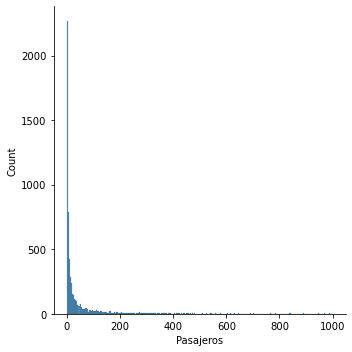

In [100]:
sns.displot(df.Pasajeros.dropna())

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pasajeros'>

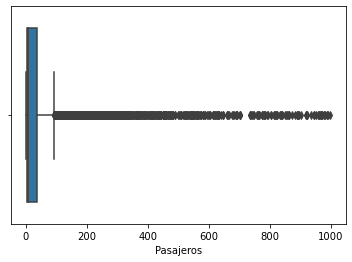

In [101]:
sns.boxplot(df.Pasajeros)

In [102]:
df.Pasajeros.describe()

count    6101.000000
mean       57.373927
std       136.382396
min         0.000000
25%         2.000000
50%         7.795000
75%        38.000000
max       999.000000
Name: Pasajeros, dtype: float64

In [103]:
df.Pasajeros.value_counts()

0.000      948
1.000      377
2.000      359
3.000      232
4.000      208
          ... 
2.364        1
519.000      1
616.000      1
5.420        1
7.071        1
Name: Pasajeros, Length: 1098, dtype: int64

In [105]:
df.groupby("Ciudad Origen")["Pasajeros"].value_counts()

Ciudad Origen  Pasajeros
ABENDEEN       1.0          1
               15.0         1
ABIDJAN        18.0         1
ABU DHABI      6.0          1
ACANDI         0.0          1
                           ..
ZURICH         87.0         1
               114.0        1
               167.0        1
               237.0        1
               411.0        1
Name: Pasajeros, Length: 3739, dtype: int64